## **Linear Regression Assignment**
####  by Manjunath V Kannavalli

## Problem Statement:

have to build a multiple linear regression model for the prediction of demand for shared bikes

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.
- BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19
- they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### Step 1 : Exploring the Data

In [86]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [87]:
# read the data
df = pd.read_csv('/Users/manjunathkannavalli/Downloads/upGrad Data Science/Course 2 Machine learning/Regression Assignment/day.csv')

In [88]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [89]:
df.shape

(730, 16)

In [90]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [91]:
# read the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Check for NULL values

In [92]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### The dataset has no null values

#### Check for DUPLICATE values

- To preserve the original dataset, we need to copy it and assign to a new variable.
- In the new copied dataset, after dropping the duplicates, if the *.shape* value is same, We can conclude that our dataset doesn't contain any duplicate values

In [93]:
df_copy = df.copy()

In [94]:
df_copy.shape

(730, 16)

In [95]:
df_copy.drop_duplicates(subset=None, inplace=True)

In [96]:
df_copy.shape

(730, 16)

In [97]:
df.shape

(730, 16)

####  dataset doesn't contain any duplicate values.

### Data Cleaning

Using *value_counts()* to findout any junk values in the dataframe
'instant' column does have unique values. So, a dummy dataframe to be created without 'instant' column and perform *value_counts()* operations

In [98]:
df_dummy = df.iloc[:,1:16]

In [99]:
for i in df_dummy:
    print(df_dummy[i].value_counts(ascending=False), ' \n'*3)

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64  
 
 

3    188
2    184
1    180
4    178
Name: season, dtype: int64  
 
 

0    365
1    365
Name: yr, dtype: int64  
 
 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64  
 
 

0    709
1     21
Name: holiday, dtype: int64  
 
 

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64  
 
 

1    504
0    226
Name: workingday, dtype: int64  
 
 

1    463
2    246
3     21
Name: weathersit, dtype: int64  
 
 

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64  
 
 

32.73440    4
18.78105    3
31.85040 

Seems like there is no junk values in the dataframe

### Removing Unwanted columns

After exploring the dataset, the following columns can be dropped from the analysis
- *'instant'* is an index value. We already have a default index
- *'dteday'* contains date and *year* & *month* columns are sufficient to carry out our analysis as we are only calculating thr total count of bikes. Hence it is redundant.
- *casual* & *registered*: These columns tells about the category of customers. It is out of scope. So, removing those columns for analysis.

To preserve the cleaned dataset for future analysis, We will create a new dataframe for our current analysis.

In [100]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [101]:
df_new = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [102]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualizing the Data

- We have to check if all the variables are linearly related or not 
- Checking if there are any multicollinearity that exist
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable

#### Visualizing numeric variable using pairplot

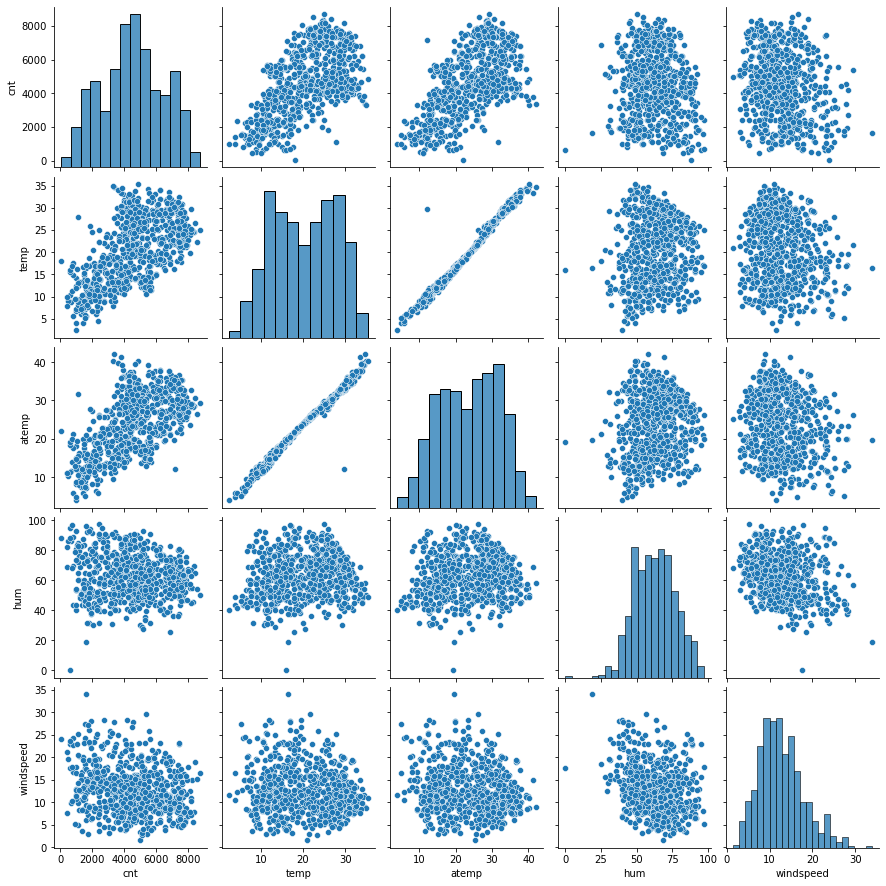

In [103]:
sns.pairplot(data = df_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

From the above pairplot, we can see a linear relationship(positive correlation) between *atemp* and *temp* and target variable *cnt* as well

#### Visualizing categorical variable using boxplot

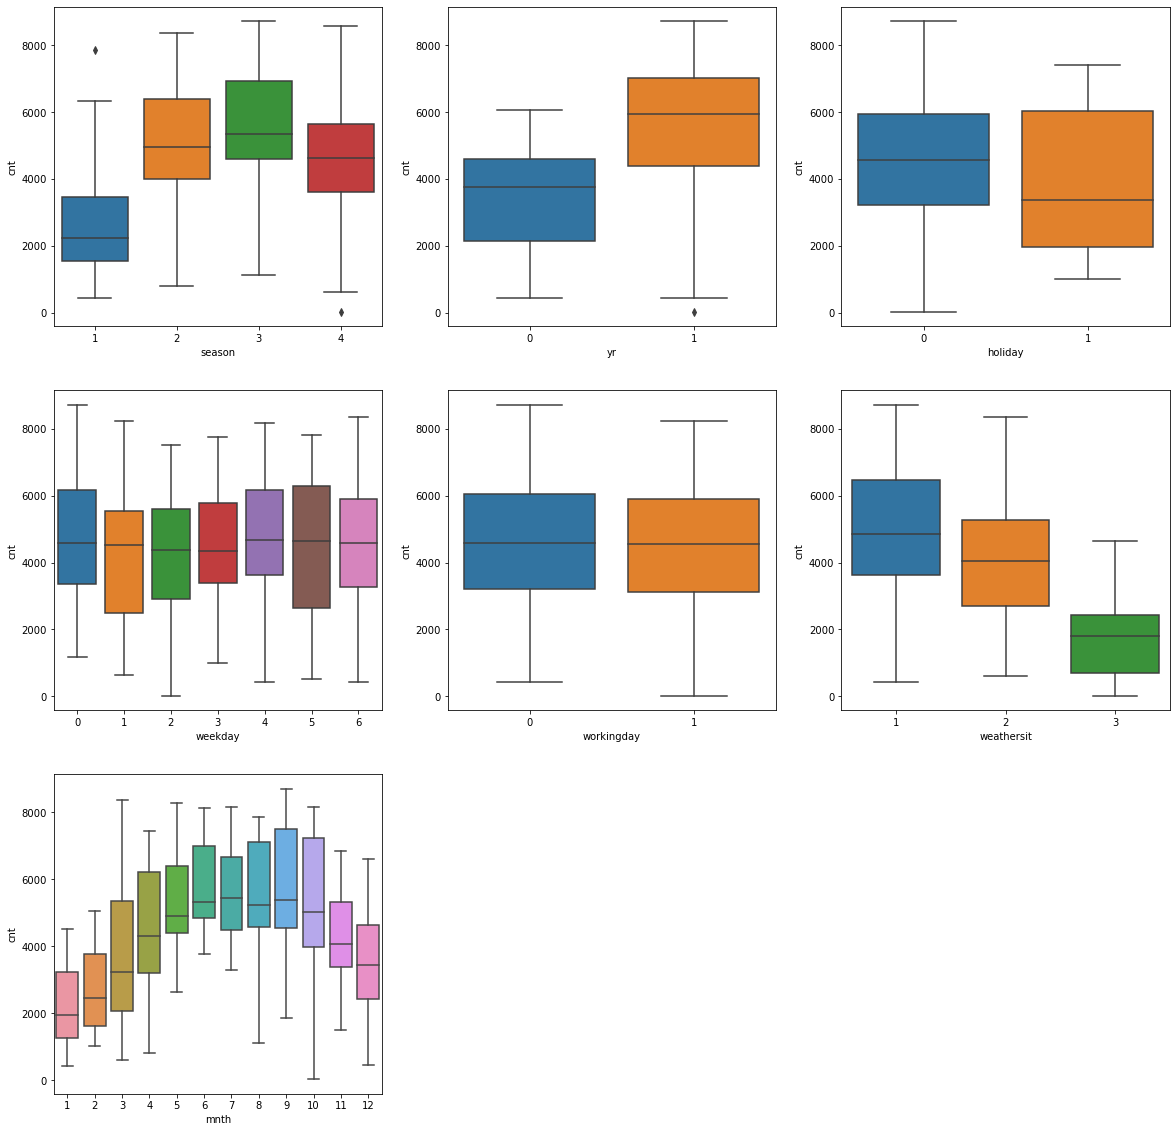

In [104]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y = 'cnt', data = df_new)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y = 'cnt', data = df_new)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y = 'cnt', data = df_new)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y = 'cnt', data = df_new)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y = 'cnt', data = df_new)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y = 'cnt', data = df_new)
plt.subplot(3,3,7)
sns.boxplot(x='mnth', y = 'cnt', data = df_new)
plt.show()

- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can see that the category 3 : Fall, has the highest median, which shows that the demand was high during fall season. It is least for 1: spring.
- The year 2019 had a higher count of users as compared to the year 2018
- The bike demand is almost constant throughout the week. Although, for thursday & friday, the median is little higher.
- The count of total users is in between 4000 to 6000 during clear weather
- The count is highest in the month of September
- The count of users is less during the holidays

### Step 3: Data Preparation

Mapping the categorical variable to their categorical string values

In [105]:
#Mapping month
df_new.mnth = df_new.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

#mapping seasons
df_new.season = df_new.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

#mapping weathersit
df_new.weathersit = df_new.weathersit.map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Snow & Rain'})

#mapping weekday
df_new.weekday = df_new.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

In [106]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### **Creating Dummy variables**

The variables *mnth* ,*weekday*, *season*, *weathersit* have levels, for ex, *weathersit* has 3 levels , similarly variable *mnth* has 12 levels.   
We will create DUMMY variables for these 4 categorical variables namely - *mnth, weekday, season & weathersit*.

In [107]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = df_new[['season','mnth','weekday','weathersit']]

In [108]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [109]:
# Adding the dummy variables to the original dataset
bike_new = pd.concat([dummy,df_new],axis = 1)

In [110]:
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [111]:
#Deleting the orginal columns season,weathersit,weekday,mnth
bike_new.drop(['season'],axis=1,inplace=True)

bike_new.drop(['weathersit'],axis=1,inplace=True)

bike_new.drop(['weekday'],axis=1,inplace=True)

bike_new.drop(['mnth'],axis=1,inplace=True)

bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [112]:
bike_new.shape

(730, 30)

In [113]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_July                     730 non-null    uint8  
 8   mnth_June                     730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

### Step 4: Splitting the data for train and test

In [114]:
train, test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [115]:
test.shape

(219, 30)

In [116]:
train.shape

(510, 30)

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_July                     510 non-null    uint8  
 8   mnth_June                     510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

### Step 5: Rescaling the features

The scale at which *cnt* and others such as *atemp, temp* are different in values.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [118]:
scaler = MinMaxScaler()

In [119]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [120]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [121]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


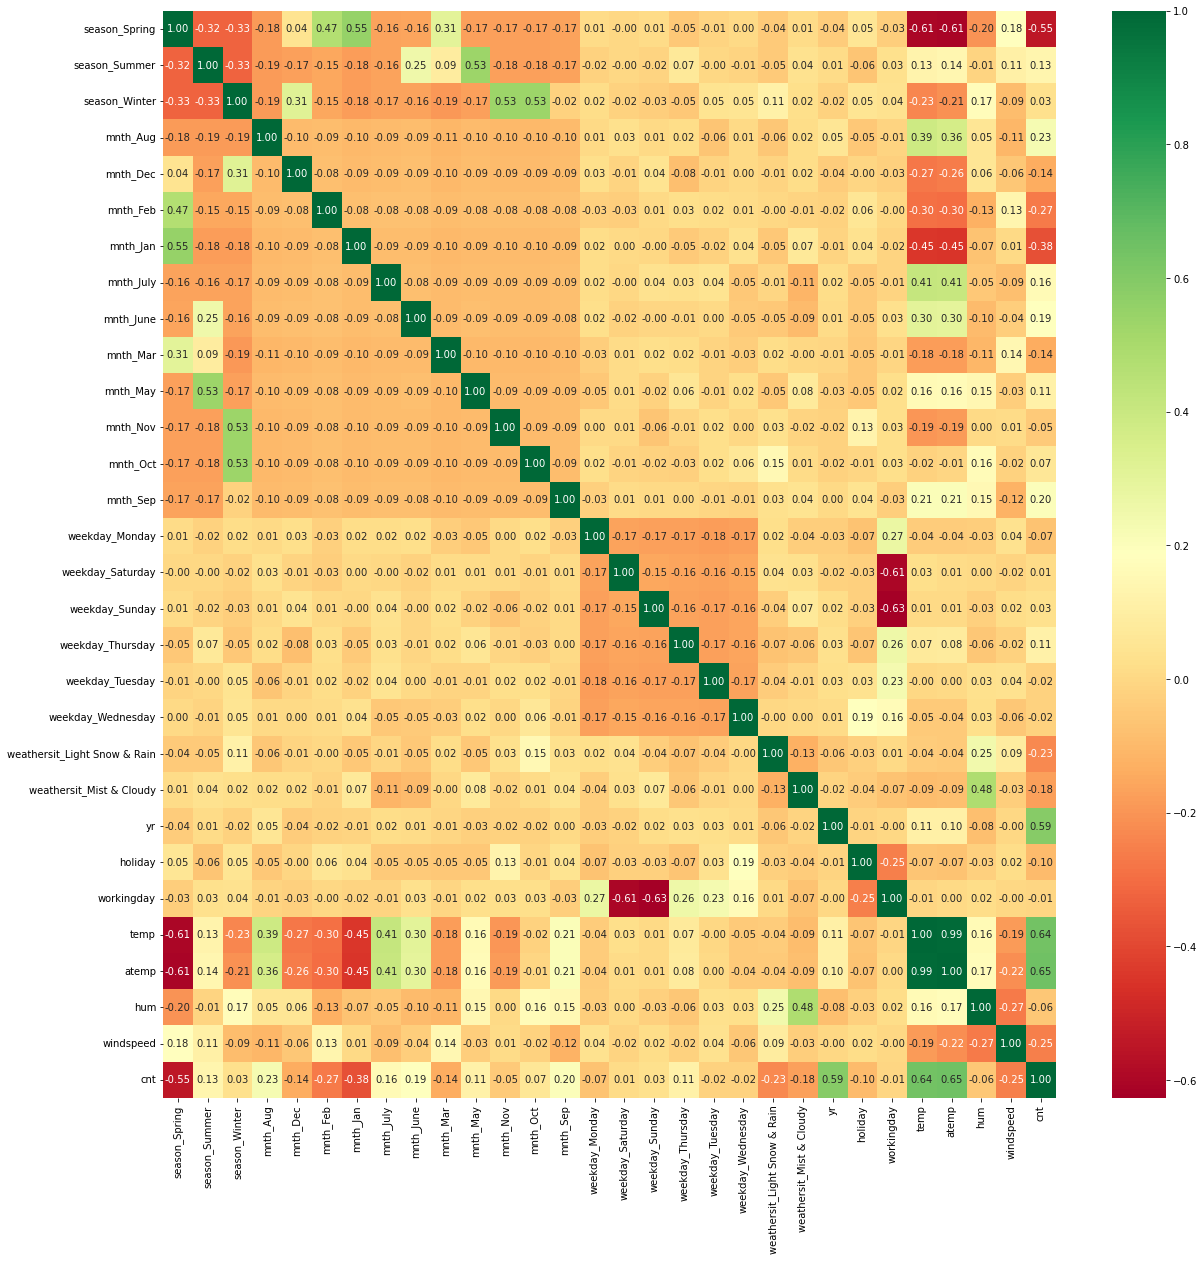

In [122]:
plt.figure(figsize = (20,20))
sns.heatmap(train.corr(), annot = True,fmt='.2f',cmap='RdYlGn')
plt.show()

*atemp,temp* are correlated to *cnt*. It is not sufficient though. So, we will use all the variables

#### Dividing into X and Y sets to build the model

In [123]:
y_train = train.pop('cnt')
x_train = train

In [124]:
y_train.shape

(510,)

### **Step 6: Building a linear model**

Here we are using *RFE* approach for feature selection and then we will use the *statsmodel* approach for building the model 

### Feature Selection

We start with 15 variables.

We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE 

In [125]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [126]:
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [127]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [128]:
col = x_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [129]:
x_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [130]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

#### Adding a constant

we have to fit a constant, otherwise the regression line starts from origin

In [131]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [132]:
x_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475


In [133]:
### Running the model

In [134]:
lm_1 = sm.OLS(y_train,x_train_rfe).fit()

In [135]:
round(lm_1.params,4)

const                           0.3202
season_Spring                  -0.0617
season_Summer                   0.0408
season_Winter                   0.1034
mnth_Dec                       -0.0372
mnth_Jan                       -0.0437
mnth_July                      -0.0555
mnth_Nov                       -0.0409
mnth_Sep                        0.0749
weathersit_Light Snow & Rain   -0.2481
weathersit_Mist & Cloudy       -0.0559
yr                              0.2303
holiday                        -0.0912
temp                            0.4800
hum                            -0.1602
windspeed                      -0.1885
dtype: float64

In [136]:
### Summary of Model 1

In [137]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          3.34e-189
Time:                        14:21:26   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

p-value for all variable is less than 0.05. Hence, we proceed with all the columns

#### Checking VIF(Variance Inflation Factor) for multicollinearity

In [138]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
1,season_Spring,5.27
13,temp,4.42
3,season_Winter,3.83
2,season_Summer,2.76
14,hum,1.93
7,mnth_Nov,1.76
5,mnth_Jan,1.68
10,weathersit_Mist & Cloudy,1.57
4,mnth_Dec,1.49


variables with VIF values less than 5 is preferred. So, there are some columns that need to be dropped

In [139]:
# dropping `const` column
x_train_rfe = x_train_rfe.drop(['const'], axis=1)

In [140]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
0,season_Spring,4.37
2,season_Winter,4.06
1,season_Summer,2.81
9,weathersit_Mist & Cloudy,2.32
10,yr,2.09
6,mnth_Nov,1.83
4,mnth_Jan,1.75


In [141]:
# dropping `hum` column
x_train_rfe = x_train_rfe.drop(['hum'], axis=1)

In [142]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_July,1.59
9,weathersit_Mist & Cloudy,1.56


As the VIF value for 'temp' variable is slightly higher than 5, we will proceed to building the model


### Preparing the final model

In [143]:
# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_rfe)

# Create a first fitted model
lm_2 = sm.OLS(y_train,x_train_lm).fit()

In [144]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.57e-186
Time:                        14:21:26   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [145]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_July,1.59
9,weathersit_Mist & Cloudy,1.56


All the variables(except 'temp' which can be ruled out as its VIF near to 5) have the VIF value less than 5. We will make 'lm_2' as final model

### **Step 7: Residual Analysis of train data**

One assumption of Linear regression is that the error terms are normally distributed. Plotting the error terms to validate that

In [146]:
y_train_cnt = lm_2.predict(x_train_lm)

Text(0.5, 0, 'Errors')

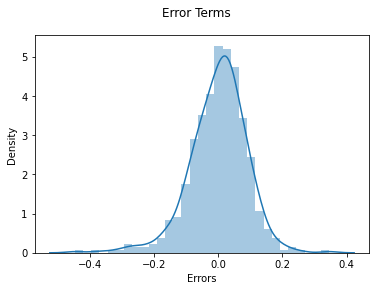

In [147]:
# Plot the histogram for error terms
fig=plt.figure()
sns.distplot((y_train-y_train_cnt))
fig.suptitle('Error Terms')
plt.xlabel('Errors')

#### Normality
Centered at zero and follows a normal distribution

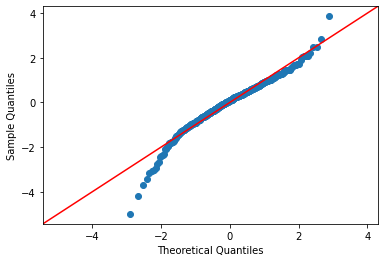

In [148]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

Major portion of datapoints fall on the 45 degree line. Means the errors terms are normally distributed

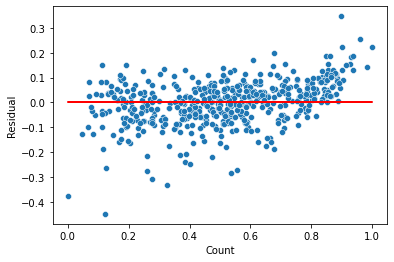

In [161]:
# homoscedasticity
#y_train_cnt = lm_2.predict(y_train)
residual = y_train-y_train_cnt
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train-y_train), '-r')
plt.ylabel('Residual')
plt.xlabel('Count')
plt.show()

No visible pattern observed from above plot for residuals.

### Step 8: Making predictions using the Final model

In [150]:
# applying the scaling on test sets

In [151]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [152]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [153]:
# Dividing into x_test and y_test
y_test = test.pop('cnt')
x_test = test

In [154]:
# Adding constant variable to test dataframe
#x_test = sm.add_constant(x_test)

Predicting from values used by final model

In [155]:
test_col = x_train_lm.columns
x_test = x_test[test_col[1:]]
x_test = sm.add_constant(x_test)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Jan                      219 non-null    uint8  
 6   mnth_July                     219 non-null    uint8  
 7   mnth_Nov                      219 non-null    uint8  
 8   mnth_Sep                      219 non-null    uint8  
 9   weathersit_Light Snow & Rain  219 non-null    uint8  
 10  weathersit_Mist & Cloudy      219 non-null    uint8  
 11  yr                            219 non-null    int64  
 12  holiday                       219 non-null    int64  
 13  temp

In [156]:
y_pred = lm_2.predict(x_test)

#### Calculating the R-squared

In [157]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8132736736429255

R-squared on trained set is 0.84 and of the test set is 0.81. It is quite nearly same. It means the model that we trained has been applying those learnings on test data

### Step 9: Model Evaluation

Plotting for actual vs predicted values

Text(0, 0.5, 'y_pred')

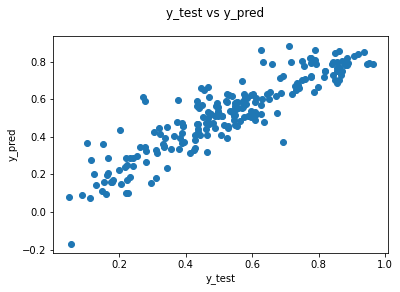

In [158]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_pred')

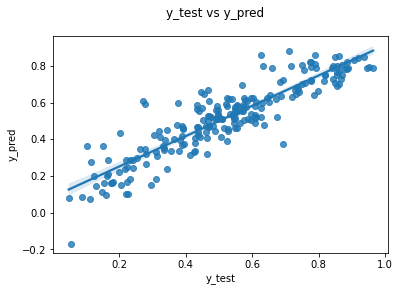

In [159]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test,y=y_pred,fit_reg=True)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Final model fit is not by chance and has decent predictive capability

### Getting the variable names and coeff values for final equation of best fitted line

In [160]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.437655
0,const,0.246635
11,yr,0.234287
3,season_Winter,0.088652
8,mnth_Sep,0.068219
2,season_Summer,0.033271
7,mnth_Nov,-0.041852
4,mnth_Dec,-0.044529
5,mnth_Jan,-0.050270


## **Conclusion**

By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2466 + 0.437 \times  temp + 0.2342  \times  yr + 0.08865 \times season Winter + 0.0682 \times mnth Sept + 0.0033 \times season Summer - 0.0418 \times mnth Nov - 0.04452 \times mnth Dec - 0.0050 \times mnth Jan - 0.0503 \times mnth Jul - 0.0716 \times season Spring - 0.0814 \times weathersit Mist Cloudy - 0.0919 \times holiday - 0.1585 \times windspeed - 0.2928 \times weathersit Light Snow Rain $

#### Those variables having positive coefficient value means increase in these values lead to an increase in value of cnt

#### Those variables having negative coefficient value means increase in these values lead to a decrease in value of cnt

- From R-squared & Adjusted R-squared value for both train and test dataset, we can say that the variables in the equation can explain more than 81% of demand.
- Coefficients of variables in the equation(depends on the value +/-) are the factors affecting the bike demand.
- From final model, the top 3 features contributing towards explaining the demand are:
- 1. Temperature
- 2. season_winter
- 3. year

Hence it is clearly concluded that temperature, season or weather and month are significant parameters in predicting the demand of Boombikes